# PIMA Diabetes Classification Project

In [2]:
#Importing the packages pandas,Numpy,SeaBorn,matplotlib,math and Numpy 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

#Importing dataset

dia_data = pd.read_csv('C:/Users/Suraj/Jupyter Projects/Project3_PIMA_Diabetes/diabetes.csv')
dia_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Checking dimensions of the data 

dia_data.shape

#There are 768 rows and 9 columns

(768, 9)

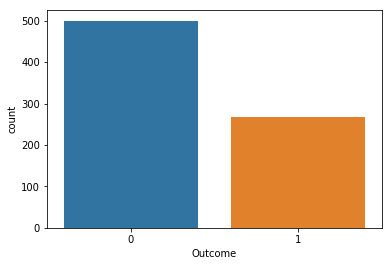

In [5]:
sns.countplot(x="Outcome",data=dia_data)

#Shows trend of patients diagonised with not diabetic and diabetic. 0 indicates not diabetic and 1 indicates diabetic.

In [8]:
dia_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

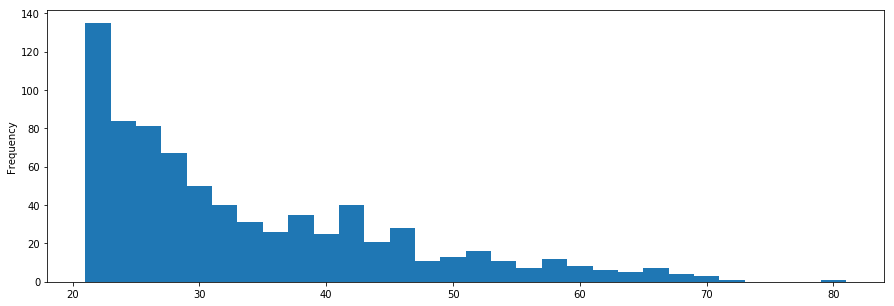

In [9]:
#Analysing By Age

# We can see that major portion of patients are in the age range of 20-30 and beyond 30 the number of patients in that age bracket decreases

dia_data["Age"].plot.hist(bins = 30, figsize =(15,5))

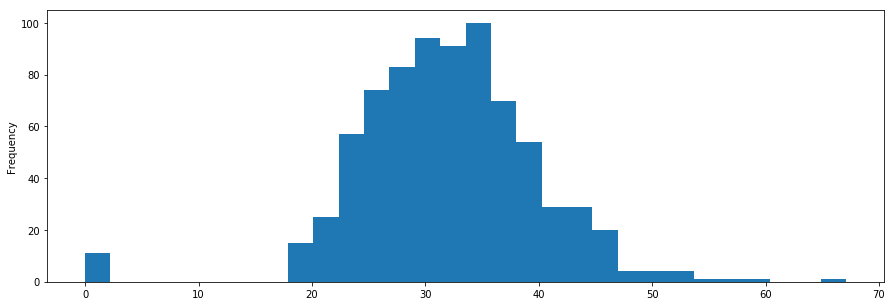

In [10]:
# Analysing by BMI 


dia_data["BMI"].plot.hist(bins = 30, figsize =(15,5))

#Major Portion of patients have a BMI ranging from 20-40 with a gradual decline

In [12]:
#Checking for missing data 

#Checking for missing data as below 

dia_data.isnull().sum()

# No missing values found and all data is avaiable hence it can be prepared for analysis

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Prepare and splitting data as Train and Test

In [13]:
#Assigning X and Y for Train Data 

X= dia_data.drop("Outcome",axis=1)
y = dia_data["Outcome"]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logreg=LogisticRegression()

In [18]:
logreg.fit(X_train,y_train)

C:\Users\Suraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
predictions = logreg.predict(X_test)

In [21]:
from sklearn.metrics import classification_report

# Classification Report Method

In [22]:
classification_report(y_test,predictions)

#Metrics

# Precision - 77%

# Recall - 55% 

# F1_score - 64%

'              precision    recall  f1-score   support\n\n           0       0.78      0.90      0.84       146\n           1       0.77      0.55      0.64        85\n\n   micro avg       0.77      0.77      0.77       231\n   macro avg       0.77      0.73      0.74       231\nweighted avg       0.77      0.77      0.76       231\n'

In [29]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix Method 

In [24]:
confusion_matrix(y_test,predictions)

array([[132,  14],
       [ 38,  47]], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test,predictions)

#Accuracy - 77.4%

0.7748917748917749